# This modeling uses NLP to determine positive or negative sentiment of user's kindle book review

# 1. Data Loading and data preprocessing

In [61]:
#Dependencies
import numpy as np
import pandas as pd
from pathlib import Path
from pycaret.nlp import *
from pycaret.classification import *
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

In [62]:
#read data
df = pd.read_csv('data.csv')

In [63]:
pd.set_option('display.max_rows',100)

In [64]:
df['reviewText']

0      pretty good story, a little exaggerated, but I...
1      If you've read other max brand westerns, you k...
2                           Love Max, always a fun twist
3                          As usual for him, a good book
4      MB is one of the original western writers and ...
                             ...                        
995    I have enjoyed all the Sisterhood books and th...
996    I have read a couple other books in this serie...
997    Fast-paced and well-written. I have some catch...
998                                  Enjoyed re reading.
999    I really enjoyed the series It is well written...
Name: reviewText, Length: 1000, dtype: object

In [65]:
#checking datatypes
df.dtypes

actual_ratings     int64
reviewText        object
summary           object
verified            bool
vote               int64
dtype: object

In [ ]:
#renaming columns
#df.rename({'overall': 'actual_ratings'}, axis=1, inplace=True)

In [ ]:
#Dropping unwanted columns
#new_df.drop(['reviewerID','asin','vote','newReviewTime'], axis=1, inplace=True)

In [ ]:
#new_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [66]:
#Removing common stopwords
stop = stopwords.words('english')

In [67]:
#Removing common stopwords
df['reviewText_sws'] = df['reviewText'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop)]))

In [68]:
df

,actual_ratings,reviewText,summary,verified,vote,reviewText_sws
0,4,"pretty good story, a little exaggerated, but I...",pretty good story,True,0,"pretty good story, little exaggerated, I liked..."
1,5,"If you've read other max brand westerns, you k...",A very good book,True,0,"If read max brand westerns, know expect, not, ..."
2,5,"Love Max, always a fun twist",Five Stars,True,0,"Love Max, always fun twist"
3,5,"As usual for him, a good book",a good,True,0,"As usual him, good book"
4,5,MB is one of the original western writers and ...,A Western,True,2,MB one original western writers many years man...
...,...,...,...,...,...,...
995,5,I have enjoyed all the Sisterhood books and th...,The Jury review,True,0,I enjoyed Sisterhood books one exception. Just...
996,2,I have read a couple other books in this serie...,Waste of time,True,0,I read couple books series unfortunately forgo...
997,5,Fast-paced and well-written. I have some catch...,Entertaining,True,0,Fast-paced well-written. I catching since I st...
998,5,Enjoyed re reading.,Five Stars,True,0,Enjoyed reading.


In [69]:
df.isnull().sum()

actual_ratings    0
reviewText        0
summary           0
verified          0
vote              0
reviewText_sws    0
dtype: int64

In [7]:
#Drop duplicate columns
#df.drop_duplicates(inplace=True, keep='first')

## Bag Of Words
## Bag Of Words (BOW) is a popular algorithm for representing text in numbers. It relies on the frequency of the words in the document. BOW has numerous applications like document classification, topic modeling, and text similarity. In BOW, every document is represented as the frequency of words present in the document. So, the frequency of words represents the importance of the words in the document.
## CountVectorizer
### Convert a collection of text documents to a matrix of token counts.
### implements both tokenization and occurrence counting in a single class:
### This implementation produces a sparse representation of the counts using scipy.sparse.csr_matrix.

In [70]:
#initialize a CountVectorizer object named ‘tf_vectorizer’.
tf_vectorizer = CountVectorizer(max_features=800,stop_words={'english'}, ngram_range=(1,1))

#"Fit" extracts the features from the dataset.
#"Transform” actually performs the transformations on the dataset.

features = tf_vectorizer.fit_transform(df['reviewText'].apply(lambda features : np.str_(features)))
features_df = pd.DataFrame(features.toarray(), columns=tf_vectorizer.get_feature_names())

In [ ]:
print("Vocabulary: ", tf_vectorizer.vocabulary_)

In [71]:
features_df.head(5)

,19th,20th,abagnale,able,about,absolutely,academy,account,action,actual,...,written,wrong,wrote,year,years,yes,yet,you,young,your
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [72]:
#concatenating "actual_ratings" column from df to feature_df
new_df = pd.concat([features_df,df['actual_ratings']],axis=1)
#new_df=features_df
#extracted_col = df["actual_ratings"]
#new_df = new_df.join(extracted_col)

In [75]:
new_df

,19th,20th,abagnale,able,about,absolutely,academy,account,action,actual,...,wrong,wrote,year,years,yes,yet,you,young,your,actual_ratings
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,4
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,5
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,5
996,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [76]:
new_df.drop(df.index[df['actual_ratings'] == 3], inplace=True)

In [77]:
#rating 4,5 as positive rating
#rating 1,2 as negative rating

new_df.loc[(df['actual_ratings'] == 4) | (new_df['actual_ratings'] == 5), 'derived_ratings'] = 'positive'
new_df.loc[(df['actual_ratings'] == 1) | (new_df['actual_ratings'] == 2), 'derived_ratings'] = 'negative'
new_df.drop(['actual_ratings'], axis=1, inplace=True)


In [78]:
#Shuffle your dataset 
new_shuffle_df = new_df.sample(frac=1)

# Define a size for your train set 
new_train_size = int(0.75 * len(new_df))

# Split your dataset 
new_train_df = new_shuffle_df[:new_train_size]
new_test_df  = new_shuffle_df[new_train_size:]

In [79]:
new_df.head(5)

,19th,20th,abagnale,able,about,absolutely,academy,account,action,actual,...,wrong,wrote,year,years,yes,yet,you,young,your,derived_ratings
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,positive
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,positive
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,positive


In [80]:
new_train_df.head(5)

,19th,20th,abagnale,able,about,absolutely,academy,account,action,actual,...,wrong,wrote,year,years,yes,yet,you,young,your,derived_ratings
246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive
665,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive
819,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive
570,0,0,0,0,4,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,negative
638,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,positive


In [83]:
new_train_df.isnull().sum()

19th               0
20th               0
abagnale           0
able               0
about              0
                  ..
yet                0
you                0
young              0
your               0
derived_ratings    0
Length: 801, dtype: int64

In [ ]:
#new_train_df.fillna(0)

In [81]:
new_test_df.head(5)

,19th,20th,abagnale,able,about,absolutely,academy,account,action,actual,...,wrong,wrote,year,years,yes,yet,you,young,your,derived_ratings
510,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
593,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,positive
122,0,0,1,1,0,0,0,2,0,0,...,0,0,1,1,0,1,3,1,0,positive
219,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive
666,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive


In [84]:
new_test_df.isnull().sum()

19th               0
20th               0
abagnale           0
able               0
about              0
                  ..
yet                0
you                0
young              0
your               0
derived_ratings    0
Length: 801, dtype: int64

In [ ]:
#new_test_df.fillna(0)

# 2. Model Building
## 2.1 Setting up the environment

In [85]:
#This function sets up the training framework and builds the transition pipeline. 
#The setup function must be called before any other function may be called.

numerical_features = list(features_df.columns)
new_clf = setup(data = new_train_df, target = 'derived_ratings',numeric_features=numerical_features,silent=True)


,Description,Value
0,session_id,815
1,Target,derived_ratings
2,Target Type,Binary
3,Label Encoded,"negative: 0, positive: 1"
4,Original Data,"(626, 801)"
5,Missing Values,False
6,Numeric Features,800
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


## 2.2 Compare Model

In [86]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8745,0.6993,0.9947,0.8774,0.9323,0.1152,0.1407,0.1410
et,Extra Trees Classifier,0.8677,0.7169,0.9816,0.8801,0.9279,0.1434,0.1750,0.1520
dummy,Dummy Classifier,0.8677,0.5000,1.0000,0.8677,0.9291,0.0000,0.0000,0.0220
lr,Logistic Regression,0.8608,0.7642,0.9500,0.8960,0.9218,0.2701,0.2999,0.7890
lightgbm,Light Gradient Boosting Machine,0.8586,0.6732,0.9658,0.8829,0.9219,0.1413,0.1581,0.2590
svm,SVM - Linear Kernel,0.8585,0.0000,0.9368,0.9039,0.9192,0.3143,0.3462,0.0330
gbc,Gradient Boosting Classifier,0.8563,0.6598,0.9526,0.8903,0.9200,0.2081,0.2132,0.3360
knn,K Neighbors Classifier,0.8562,0.5657,0.9816,0.8695,0.9221,0.0248,0.0419,0.0520
ada,Ada Boost Classifier,0.8426,0.5843,0.9421,0.8847,0.9117,0.1396,0.1464,0.1140
ridge,Ridge Classifier,0.8127,0.0000,0.8816,0.9006,0.8903,0.2306,0.2334,0.0250


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=815, verbose=0,
                       warm_start=False)

In [87]:
K_FOLDS = 5
top_model = compare_models(sort='F1',
                           fold=K_FOLDS,
                           n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8744,0.6947,0.9947,0.8773,0.9323,0.1123,0.1358,0.1420
gbc,Gradient Boosting Classifier,0.8745,0.6545,0.9711,0.8941,0.9307,0.2694,0.3017,0.2860
dummy,Dummy Classifier,0.8676,0.5000,1.0000,0.8676,0.9291,0.0000,0.0000,0.0300
et,Extra Trees Classifier,0.8676,0.7127,0.9868,0.8763,0.9282,0.1021,0.1259,0.1600
lightgbm,Light Gradient Boosting Machine,0.8676,0.6900,0.9711,0.8875,0.9269,0.2025,0.2500,0.0660
knn,K Neighbors Classifier,0.8631,0.5630,0.9842,0.8738,0.9257,0.0813,0.1292,0.0700
ada,Ada Boost Classifier,0.8563,0.6619,0.9474,0.8937,0.9195,0.2415,0.2487,0.1180
lr,Logistic Regression,0.8425,0.7253,0.9447,0.8824,0.9122,0.1394,0.1497,0.0580
svm,SVM - Linear Kernel,0.8334,0.0000,0.9237,0.8893,0.9054,0.1683,0.1819,0.0460
ridge,Ridge Classifier,0.8195,0.0000,0.8895,0.9017,0.8951,0.2416,0.2440,0.0360


In [88]:
top_model

[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=-1, oob_score=False, random_state=815, verbose=0,
                        warm_start=False),
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='deviance', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=10

## 2.3 Model Tuning

In [89]:
tuned_model_1 = tune_model(top_model[1], optimize='F1',
                         choose_better=True, fold=K_FOLDS);

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8636,0.6804,1.0000,0.8636,0.9268,0.0000,0.0000
1,0.8864,0.5987,0.9868,0.8929,0.9375,0.3293,0.3902
2,0.8523,0.5998,0.9868,0.8621,0.9202,-0.0214,-0.0426
3,0.8851,0.5831,1.0000,0.8837,0.9383,0.1487,0.2834
4,0.8966,0.6238,1.0000,0.8941,0.9441,0.2797,0.4032
Mean,0.8768,0.6172,0.9947,0.8793,0.9334,0.1472,0.2068
Std,0.0163,0.0342,0.0064,0.0139,0.0086,0.1420,0.1913


In [90]:
tuned_model_2 = tune_model(top_model[0], optimize='F1',
                         choose_better=True, fold=K_FOLDS);

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8636,0.5000,1.0000,0.8636,0.9268,0.0000,0.0000
1,0.8636,0.5000,1.0000,0.8636,0.9268,0.0000,0.0000
2,0.8636,0.5000,1.0000,0.8636,0.9268,0.0000,0.0000
3,0.8736,0.5000,1.0000,0.8736,0.9325,0.0000,0.0000
4,0.8736,0.5000,1.0000,0.8736,0.9325,0.0000,0.0000
Mean,0.8676,0.5000,1.0000,0.8676,0.9291,0.0000,0.0000
Std,0.0049,0.0000,0.0000,0.0049,0.0028,0.0000,0.0000


In [91]:
tuned_model_2

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=815, verbose=0,
                       warm_start=False)

In [92]:
bagged_model = ensemble_model(tuned_model_1, optimize="F1",
                              fold=K_FOLDS) 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8636,0.7127,1.0000,0.8636,0.9268,0.0000,0.0000
1,0.8750,0.7697,1.0000,0.8736,0.9325,0.1357,0.2698
2,0.8523,0.5559,0.9868,0.8621,0.9202,-0.0214,-0.0426
3,0.8736,0.6746,1.0000,0.8736,0.9325,0.0000,0.0000
4,0.8851,0.6053,0.9868,0.8929,0.9375,0.2448,0.3072
Mean,0.8699,0.6637,0.9947,0.8731,0.9299,0.0718,0.1069
Std,0.0111,0.0759,0.0064,0.0110,0.0059,0.1030,0.1496


## Model Evaluation and Prediction on unknown Dataset 

In [93]:
best_model = bagged_model
predict_model(best_model);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8936,0.7380,1.0000,0.8930,0.9435,0.0816,0.2062


In [ ]:
#plot_model(best_model, plot="parameter")

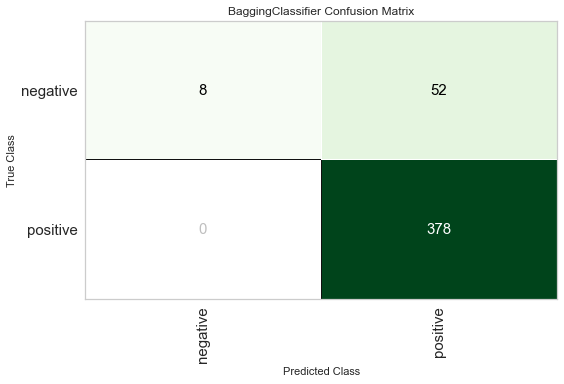

In [47]:
plot_model(best_model, plot="confusion_matrix",use_train_data = True)

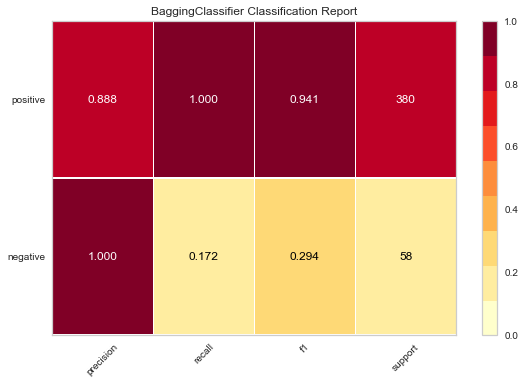

In [95]:
plot_model(best_model, plot="class_report" , use_train_data=True)

In [96]:
#Finalize model
final_model = finalize_model(best_model)

In [97]:
prediction = predict_model(final_model);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8936,0.8366,1.0000,0.8930,0.9435,0.0816,0.2062


In [ ]:
#final_model.predict(new_test_df)

In [98]:
#predict Unseen data
predict_unseen = predict_model(final_model, data=new_test_df);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0,0.6428,0,0,0,0,0


In [100]:
predict_unseen.head(10)

,19th,20th,abagnale,able,about,absolutely,academy,account,action,actual,...,year,years,yes,yet,you,young,your,derived_ratings,Label,Score
510,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,negative,positive,0.8918
593,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,positive,positive,0.9132
122,0,0,1,1,0,0,0,2,0,0,...,1,1,0,1,3,1,0,positive,positive,0.7979
219,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,positive,positive,0.8985
666,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,positive,positive,0.8762
208,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,2,0,0,positive,positive,0.8973
498,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,positive,positive,0.7395
797,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,negative,positive,0.8304
484,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,1,0,1,negative,positive,0.8669
73,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,positive,positive,0.9133


In [103]:
save_model(final_model,"deployment_04142022")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=['19th', '20th',
                                                           'abagnale', 'able',
                                                           'about', 'absolutely',
                                                           'academy', 'account',
                                                           'action', 'actual',
                                                           'actually',
                                                           'adventure', 'after',
                                                           'again', 'against',
                                                        